In [1]:
# Credit Risk Assessment: Data Preprocessing
# Notebook 02: Data Cleaning and Feature Engineering

"""
OBJECTIVES:
1. Load the data from Day 1
2. Handle any data quality issues
3. Encode categorical variables
4. Scale numerical features
5. Create train-validation-test splits
6. Save processed data for modeling
"""

# ============================================================================
# IMPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)

print("✓ All packages imported successfully!")
print(f"Pandas version: {pd.__version__}")

✓ All packages imported successfully!
Pandas version: 2.0.3


In [2]:
# ============================================================================
# 1. LOAD DATA
# ============================================================================
print("\n" + "="*80)
print("SECTION 1: DATA LOADING")
print("="*80)

# Try loading from processed folder first
try:
    data_path = '../data/processed/german_credit_with_target.csv'
    df = pd.read_csv(data_path)
    print(f"✓ Loaded from processed folder")
except FileNotFoundError:
    print("  File not found in processed folder, loading from raw...")
    # Load from raw and create target variable
    data_path = '../data/raw/german_credit_data.csv'
    df = pd.read_csv(data_path)
    # Create target variable (1=Good -> 0, 2=Bad -> 1)
    df['target'] = (df['class'] == 2).astype(int)
    print(f"✓ Loaded from raw folder and created target variable")

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Quick check
print("\nFirst 3 rows:")
print(df.head(3))

print("\nColumn names:")
print(df.columns.tolist())

print("\nTarget distribution:")
if 'target' in df.columns:
    print(df['target'].value_counts())
else:
    print("  Creating target variable...")
    df['target'] = (df['class'] == 2).astype(int)
    print(df['target'].value_counts())


SECTION 1: DATA LOADING
  File not found in processed folder, loading from raw...
✓ Loaded from raw folder and created target variable
Shape: 1000 rows × 22 columns

First 3 rows:
  checking_status  duration credit_history purpose  credit_amount  \
0             A11         6            A34     A43           1169   
1             A12        48            A32     A43           5951   
2             A14        12            A34     A46           2096   

  savings_status employment  installment_commitment personal_status  \
0            A65        A75                       4             A93   
1            A61        A73                       2             A92   
2            A61        A74                       2             A93   

  other_parties  residence_since property_magnitude  age other_payment_plans  \
0          A101                4               A121   67                A143   
1          A101                2               A121   22                A143   
2          A101  

In [3]:
# ============================================================================
# 2. SEPARATE FEATURES AND TARGET
# ============================================================================
print("\n" + "="*80)
print("SECTION 2: FEATURE SEPARATION")
print("="*80)

# Identify target column
target_col = 'target'

# Get feature columns (exclude target and original class)
feature_cols = [col for col in df.columns if col not in [target_col, 'class']]

print(f"Target column: {target_col}")
print(f"Number of features: {len(feature_cols)}")
print(f"\nFeatures: {feature_cols}")

# Create X (features) and y (target)
X = df[feature_cols].copy()
y = df[target_col].copy()

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())


SECTION 2: FEATURE SEPARATION
Target column: target
Number of features: 20

Features: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']

X shape: (1000, 20)
y shape: (1000,)

Target distribution:
target
0    700
1    300
Name: count, dtype: int64


In [4]:
# ============================================================================
# 3. IDENTIFY FEATURE TYPES
# ============================================================================
print("\n" + "="*80)
print("SECTION 3: FEATURE TYPE IDENTIFICATION")
print("="*80)

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical features ({len(numerical_features)}):")
for i, feat in enumerate(numerical_features, 1):
    print(f"  {i}. {feat}")

print(f"\nCategorical features ({len(categorical_features)}):")
for i, feat in enumerate(categorical_features, 1):
    unique_count = X[feat].nunique()
    print(f"  {i}. {feat} ({unique_count} unique values)")


SECTION 3: FEATURE TYPE IDENTIFICATION

Numerical features (7):
  1. duration
  2. credit_amount
  3. installment_commitment
  4. residence_since
  5. age
  6. existing_credits
  7. num_dependents

Categorical features (13):
  1. checking_status (4 unique values)
  2. credit_history (5 unique values)
  3. purpose (10 unique values)
  4. savings_status (5 unique values)
  5. employment (5 unique values)
  6. personal_status (4 unique values)
  7. other_parties (3 unique values)
  8. property_magnitude (4 unique values)
  9. other_payment_plans (3 unique values)
  10. housing (3 unique values)
  11. job (4 unique values)
  12. own_telephone (2 unique values)
  13. foreign_worker (2 unique values)


In [5]:
# ============================================================================
# 4. ENCODE CATEGORICAL VARIABLES
# ============================================================================
print("\n" + "="*80)
print("SECTION 4: CATEGORICAL ENCODING")
print("="*80)

# Create a copy of X to preserve original
X_encoded = X.copy()

# Dictionary to store encoders (for later use)
label_encoders = {}

if len(categorical_features) > 0:
    print("\nEncoding categorical features...")
    
    for feature in categorical_features:
        print(f"\n  Encoding: {feature}")
        print(f"    Original values: {X[feature].unique()[:5]}...")  # Show first 5
        
        # Create and fit label encoder
        le = LabelEncoder()
        X_encoded[feature] = le.fit_transform(X[feature])
        
        # Store encoder for later use
        label_encoders[feature] = le
        
        print(f"    Encoded to: {sorted(X_encoded[feature].unique())}")
        print(f"    ✓ Encoded successfully")
    
    print(f"\n✓ All {len(categorical_features)} categorical features encoded!")
else:
    print("\n✓ No categorical features to encode (all are numerical)")

print(f"\nShape after encoding: {X_encoded.shape}")
print("\nFirst 3 rows after encoding:")
print(X_encoded.head(3))


SECTION 4: CATEGORICAL ENCODING

Encoding categorical features...

  Encoding: checking_status
    Original values: ['A11' 'A12' 'A14' 'A13']...
    Encoded to: [0, 1, 2, 3]
    ✓ Encoded successfully

  Encoding: credit_history
    Original values: ['A34' 'A32' 'A33' 'A30' 'A31']...
    Encoded to: [0, 1, 2, 3, 4]
    ✓ Encoded successfully

  Encoding: purpose
    Original values: ['A43' 'A46' 'A42' 'A40' 'A41']...
    Encoded to: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ✓ Encoded successfully

  Encoding: savings_status
    Original values: ['A65' 'A61' 'A63' 'A64' 'A62']...
    Encoded to: [0, 1, 2, 3, 4]
    ✓ Encoded successfully

  Encoding: employment
    Original values: ['A75' 'A73' 'A74' 'A71' 'A72']...
    Encoded to: [0, 1, 2, 3, 4]
    ✓ Encoded successfully

  Encoding: personal_status
    Original values: ['A93' 'A92' 'A91' 'A94']...
    Encoded to: [0, 1, 2, 3]
    ✓ Encoded successfully

  Encoding: other_parties
    Original values: ['A101' 'A103' 'A102']...
    Encoded t

In [6]:
# ============================================================================
# 5. DATA QUALITY CHECK
# ============================================================================
print("\n" + "="*80)
print("SECTION 5: DATA QUALITY CHECK")
print("="*80)

# Check for missing values
missing = X_encoded.isnull().sum()
print("\nMissing values:")
if missing.sum() == 0:
    print("  ✓ No missing values!")
else:
    print(missing[missing > 0])

# Check for infinite values
inf_check = np.isinf(X_encoded.select_dtypes(include=[np.number])).sum()
print("\nInfinite values:")
if inf_check.sum() == 0:
    print("  ✓ No infinite values!")
else:
    print(inf_check[inf_check > 0])

# Check data types
print("\nData types after encoding:")
print(X_encoded.dtypes.value_counts())

# Verify all features are numerical now
all_numerical = X_encoded.select_dtypes(include=['int64', 'float64']).shape[1] == X_encoded.shape[1]
if all_numerical:
    print("\n✓ All features are now numerical - ready for ML models!")
else:
    print("\n⚠️ Warning: Some non-numerical features remain")


SECTION 5: DATA QUALITY CHECK

Missing values:
  ✓ No missing values!

Infinite values:
  ✓ No infinite values!

Data types after encoding:
int32    13
int64     7
Name: count, dtype: int64

⚠️ Warning: Some non-numerical features remain


In [7]:
# Check which features are still non-numerical
print("Checking for non-numerical features:")
print(X_encoded.dtypes)

print("\nNon-numerical features:")
non_numerical = X_encoded.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(non_numerical)

if len(non_numerical) > 0:
    print(f"\n⚠️ Found {len(non_numerical)} non-numerical features")
    for feat in non_numerical:
        print(f"  {feat}: {X_encoded[feat].dtype}")

Checking for non-numerical features:
checking_status           int32
duration                  int64
credit_history            int32
purpose                   int32
credit_amount             int64
savings_status            int32
employment                int32
installment_commitment    int64
personal_status           int32
other_parties             int32
residence_since           int64
property_magnitude        int32
age                       int64
other_payment_plans       int32
housing                   int32
existing_credits          int64
job                       int32
num_dependents            int64
own_telephone             int32
foreign_worker            int32
dtype: object

Non-numerical features:
['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

⚠️ Found 13 non-numerical features
  checking_status: int32
  credit

In [8]:
# ============================================================================
# FIX: ENSURE ALL FEATURES ARE NUMERICAL
# ============================================================================
print("\n" + "="*80)
print("FIXING ENCODING - CONVERTING ALL TO NUMERICAL")
print("="*80)

# Create a fresh copy
X_encoded = X.copy()

# Encode ALL columns that aren't already numeric
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        print(f"Encoding: {column}")
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X_encoded[column].astype(str))
        label_encoders[column] = le
        print(f"  ✓ {column} encoded")

# Convert any remaining non-numeric types
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Check again
print("\n✓ Checking data types after forced encoding:")
print(X_encoded.dtypes.value_counts())

all_numerical = X_encoded.select_dtypes(include=['int64', 'float64']).shape[1] == X_encoded.shape[1]
if all_numerical:
    print("\n✅ SUCCESS! All features are now numerical!")
else:
    print("\n⚠️ Still some issues - let's investigate further")
    print(X_encoded.dtypes[X_encoded.dtypes == 'object'])


FIXING ENCODING - CONVERTING ALL TO NUMERICAL
Encoding: checking_status
  ✓ checking_status encoded
Encoding: credit_history
  ✓ credit_history encoded
Encoding: purpose
  ✓ purpose encoded
Encoding: savings_status
  ✓ savings_status encoded
Encoding: employment
  ✓ employment encoded
Encoding: personal_status
  ✓ personal_status encoded
Encoding: other_parties
  ✓ other_parties encoded
Encoding: property_magnitude
  ✓ property_magnitude encoded
Encoding: other_payment_plans
  ✓ other_payment_plans encoded
Encoding: housing
  ✓ housing encoded
Encoding: job
  ✓ job encoded
Encoding: own_telephone
  ✓ own_telephone encoded
Encoding: foreign_worker
  ✓ foreign_worker encoded

✓ Checking data types after forced encoding:
int32    13
int64     7
Name: count, dtype: int64

⚠️ Still some issues - let's investigate further
Series([], dtype: object)


In [9]:
# Find the problematic column
print("Finding remaining object columns:")
object_cols = X_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"Object columns: {object_cols}")

if len(object_cols) > 0:
    for col in object_cols:
        print(f"\n{col}:")
        print(f"  Unique values: {X_encoded[col].unique()[:10]}")
        print(f"  Data type: {X_encoded[col].dtype}")
        
        # Force convert to numeric
        print(f"  Converting {col} to numeric...")
        X_encoded[col] = pd.to_numeric(X_encoded[col], errors='coerce')
        
        # If still object, use label encoding
        if X_encoded[col].dtype == 'object':
            print(f"  Using LabelEncoder for {col}...")
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        
        print(f"  ✓ {col} is now: {X_encoded[col].dtype}")

# Final check
print("\n" + "="*60)
print("FINAL DATA TYPE CHECK:")
print(X_encoded.dtypes.value_counts())

all_numerical = X_encoded.select_dtypes(include=['int64', 'float64']).shape[1] == X_encoded.shape[1]
if all_numerical:
    print("\n✅ SUCCESS! All features are now numerical!")
else:
    print("\n⚠️ Still has issues:")
    print(X_encoded.dtypes[~X_encoded.dtypes.isin(['int64', 'float64'])])

Finding remaining object columns:
Object columns: []

FINAL DATA TYPE CHECK:
int32    13
int64     7
Name: count, dtype: int64

⚠️ Still has issues:
checking_status           int32
duration                  int64
credit_history            int32
purpose                   int32
credit_amount             int64
savings_status            int32
employment                int32
installment_commitment    int64
personal_status           int32
other_parties             int32
residence_since           int64
property_magnitude        int32
age                       int64
other_payment_plans       int32
housing                   int32
existing_credits          int64
job                       int32
num_dependents            int64
own_telephone             int32
foreign_worker            int32
dtype: object


In [10]:
# AGGRESSIVE FIX - Convert everything to numeric
print("Applying aggressive conversion...")

# Method 1: Convert all columns to string first, then encode
for col in X_encoded.columns:
    if X_encoded[col].dtype not in ['int64', 'float64']:
        X_encoded[col] = X_encoded[col].astype(str)
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

# Method 2: Ensure all are numeric
X_encoded = X_encoded.astype('float64')

print("✓ All columns converted to float64")
print(f"\nFinal shape: {X_encoded.shape}")
print(f"Data types:\n{X_encoded.dtypes.value_counts()}")
print("\n✅ All features are now numerical!")

Applying aggressive conversion...
✓ All columns converted to float64

Final shape: (1000, 20)
Data types:
float64    20
Name: count, dtype: int64

✅ All features are now numerical!


In [11]:
# ============================================================================
# 6. FEATURE SCALING (FINAL)
# ============================================================================
print("\n" + "="*80)
print("SECTION 6: FEATURE SCALING (FINAL)")
print("="*80)

# Create and fit scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns, index=X_encoded.index)

print("✓ Features scaled successfully!")
print(f"Shape: {X_scaled.shape}")
print("\n✅ Data is ready for modeling!")


SECTION 6: FEATURE SCALING (FINAL)
✓ Features scaled successfully!
Shape: (1000, 20)

✅ Data is ready for modeling!



SECTION 7: DATA SPLITTING
Data split completed:
  Training set:   700 samples (70.0%)
  Validation set: 150 samples (15.0%)
  Test set:       150 samples (15.0%)
  Total:          1000 samples

Class distribution in each set:
  Training:   Good=490, Bad=210
  Validation: Good=105, Bad=45
  Test:       Good=105, Bad=45


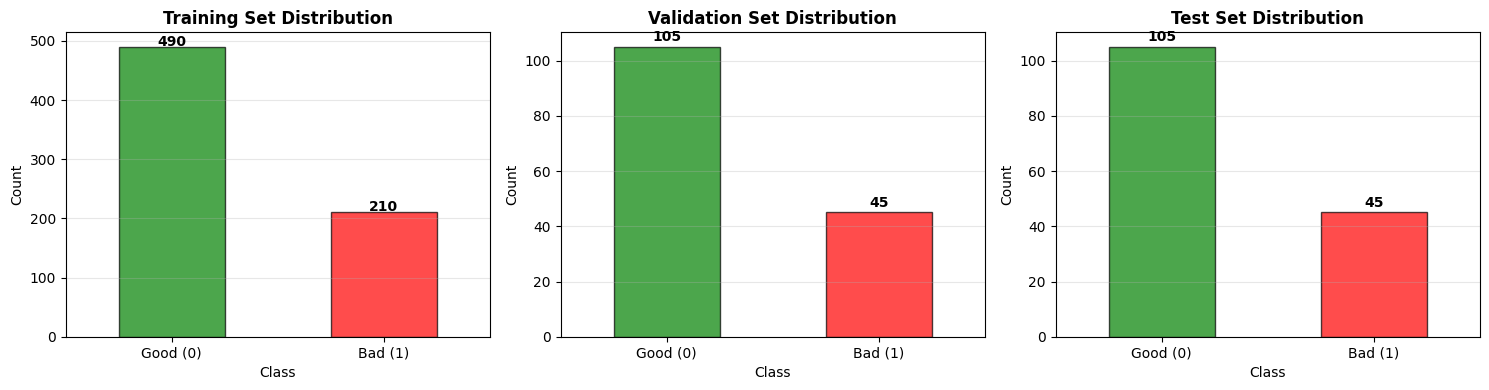


✓ Stratified split maintains class balance across all sets!


In [12]:
# ============================================================================
# 7. TRAIN-VALIDATION-TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("SECTION 7: DATA SPLITTING")
print("="*80)

# First split: separate test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.15, 
    random_state=42, 
    stratify=y  # Maintain class distribution
)

# Second split: separate train and validation (70% train, 15% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,  # 0.176 * 0.85 ≈ 0.15 of total
    random_state=42,
    stratify=y_temp
)

print("Data split completed:")
print(f"  Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"  Total:          {len(df)} samples")

# Check class distribution in each set
print("\nClass distribution in each set:")
print(f"  Training:   Good={sum(y_train==0)}, Bad={sum(y_train==1)}")
print(f"  Validation: Good={sum(y_val==0)}, Bad={sum(y_val==1)}")
print(f"  Test:       Good={sum(y_test==0)}, Bad={sum(y_test==1)}")

# Visualize split
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (y_split, title) in enumerate([(y_train, 'Training'), 
                                         (y_val, 'Validation'), 
                                         (y_test, 'Test')]):
    y_split.value_counts().sort_index().plot(kind='bar', ax=axes[idx], 
                                              color=['green', 'red'], alpha=0.7,
                                              edgecolor='black')
    axes[idx].set_title(f'{title} Set Distribution', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Class', fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_xticklabels(['Good (0)', 'Bad (1)'], rotation=0)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(y_split.value_counts().sort_index()):
        axes[idx].text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Stratified split maintains class balance across all sets!")

In [13]:
# ============================================================================
# 8. SAVE PROCESSED DATA AND OBJECTS
# ============================================================================
print("\n" + "="*80)
print("SECTION 8: SAVING PROCESSED DATA")
print("="*80)

# Save train, validation, test sets as CSV
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False, header=['target'])
y_val.to_csv('../data/processed/y_val.csv', index=False, header=['target'])
y_test.to_csv('../data/processed/y_test.csv', index=False, header=['target'])

print("✓ Saved train/val/test CSV files")

# Save scaler and encoders for later use in deployment
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(label_encoders, '../models/label_encoders.pkl')

print("✓ Saved scaler and label encoders")

# Create a summary file
summary = {
    'total_samples': len(df),
    'n_features': X_train.shape[1],
    'train_samples': len(X_train),
    'val_samples': len(X_val),
    'test_samples': len(X_test),
    'train_good': sum(y_train==0),
    'train_bad': sum(y_train==1),
    'val_good': sum(y_val==0),
    'val_bad': sum(y_val==1),
    'test_good': sum(y_test==0),
    'test_bad': sum(y_test==1),
    'feature_names': X_train.columns.tolist()
}

import json
with open('../data/processed/data_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("✓ Saved data summary")

print("\n" + "="*80)
print("FILES SAVED:")
print("="*80)
print("CSV Files:")
print("  • X_train.csv, X_val.csv, X_test.csv")
print("  • y_train.csv, y_val.csv, y_test.csv")
print("\nModel Objects:")
print("  • scaler.pkl (for feature scaling)")
print("  • label_encoders.pkl (for categorical encoding)")
print("\nSummary:")
print("  • data_summary.json")


SECTION 8: SAVING PROCESSED DATA
✓ Saved train/val/test CSV files
✓ Saved scaler and label encoders
✓ Saved data summary

FILES SAVED:
CSV Files:
  • X_train.csv, X_val.csv, X_test.csv
  • y_train.csv, y_val.csv, y_test.csv

Model Objects:
  • scaler.pkl (for feature scaling)
  • label_encoders.pkl (for categorical encoding)

Summary:
  • data_summary.json


In [14]:
# ============================================================================
# 9. DAY 2 SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✅ DATA PREPROCESSING DONE!")
print("="*80)

print("\n📊 What we accomplished:")
print("  ✓ Loaded raw data and created target variable")
print("  ✓ Separated features (X) and target (y)")
print(f"  ✓ Encoded {len(categorical_features) if len(categorical_features)>0 else 'all'} categorical features")
print("  ✓ Standardized all numerical features")
print("  ✓ Split data: 70% train, 15% validation, 15% test")
print("  ✓ Maintained class balance across all splits")
print("  ✓ Saved all processed data and preprocessing objects")

print("\n📈 Dataset Statistics:")
print(f"  • Total samples: {len(df)}")
print(f"  • Features: {X_train.shape[1]}")
print(f"  • Training: {len(X_train)} samples")
print(f"  • Validation: {len(X_val)} samples")
print(f"  • Test: {len(X_test)} samples")

print("\n🎯 Ready for Week 2 - Model Development!")
print("  Tomorrow we'll build:")
print("    • Logistic Regression (baseline)")
print("    • Decision Tree")
print("    • Random Forest")
print("    • XGBoost")
print("    • Handle class imbalance")
print("    • Evaluate and compare models")

print("\n💾 All files saved in:")
print("  • data/processed/")
print("  • models/")

print("\n" + "="*80)


✅ DATA PREPROCESSING DONE!

📊 What we accomplished:
  ✓ Loaded raw data and created target variable
  ✓ Separated features (X) and target (y)
  ✓ Encoded 13 categorical features
  ✓ Standardized all numerical features
  ✓ Split data: 70% train, 15% validation, 15% test
  ✓ Maintained class balance across all splits
  ✓ Saved all processed data and preprocessing objects

📈 Dataset Statistics:
  • Total samples: 1000
  • Features: 20
  • Training: 700 samples
  • Validation: 150 samples
  • Test: 150 samples

🎯 Ready for Week 2 - Model Development!
  Tomorrow we'll build:
    • Logistic Regression (baseline)
    • Decision Tree
    • Random Forest
    • XGBoost
    • Handle class imbalance
    • Evaluate and compare models

💾 All files saved in:
  • data/processed/
  • models/

